In [6]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import load_crop_folder

Preparation

In [3]:
rice = load_crop_folder("../data/rice").mean(dim=("lat", "lon"))
maize = load_crop_folder("../data/maize").mean(dim=("lat", "lon"))
wheat = load_crop_folder("../data/wheat").mean(dim=("lat", "lon"))
soybean = load_crop_folder("../data/soybean").mean(dim=("lat", "lon"))

Standardization

In [4]:
def zscore(da):
    return (da - da.mean("time")) / da.std("time")

rice_z = zscore(rice)
maize_z = zscore(maize)
wheat_z = zscore(wheat)
soybean_z = zscore(soybean)

Correlations

In [5]:
df = pd.DataFrame({
    "rice": rice_z.values,
    "maize": maize_z.values,
    "wheat": wheat_z.values,
    "soybean": soybean_z.values,
}, index=rice_z.time.values)

df.corr()

,rice,maize,wheat,soybean
rice,1.000000,0.973250,0.888499,0.958544
maize,0.973250,1.000000,0.840237,0.943320
wheat,0.888499,0.840237,1.000000,0.836705
soybean,0.958544,0.943320,0.836705,1.000000


In [7]:
portfolio = xr.concat(
    [rice_z, maize_z, wheat_z, soybean_z],
    dim="crop"
).mean("crop")


Volatility comparison

In [8]:
df["portfolio"] = portfolio.values
df.std()

rice         1.014185
maize        1.014185
wheat        1.014185
soybean      1.014185
portfolio    0.978081
dtype: float32

Visualization

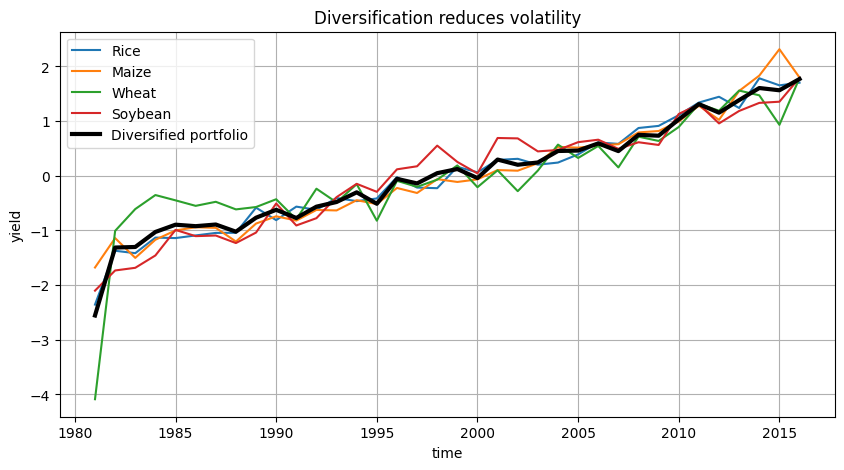

In [9]:
plt.figure(figsize=(10,5))
rice_z.plot(label="Rice")
maize_z.plot(label="Maize")
wheat_z.plot(label="Wheat")
soybean_z.plot(label="Soybean")
portfolio.plot(label="Diversified portfolio", linewidth=3, color="black")
plt.legend()
plt.title("Diversification reduces volatility")
plt.grid(True)
plt.show()